In [55]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import LearningRateScheduler, ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
import pickle
import scipy



Initially we will train data with simple CNN model


In [56]:
(training_images, training_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [57]:
training_images, test_images = training_images / 255.0, test_images / 255.0

In [13]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(64,(3,3), activation='relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(64,(3,3), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [14]:
history = model1.fit(training_images,training_labels,epochs=50,validation_data=(test_images,test_labels))

Epoch 1/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5384 - accuracy: 0.4367 - val_loss: 1.2718 - val_accuracy: 0.5336
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1746 - accuracy: 0.5819 - val_loss: 1.1045 - val_accuracy: 0.6053
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0218 - accuracy: 0.6412 - val_loss: 1.0125 - val_accuracy: 0.6478
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9242 - accuracy: 0.6766 - val_loss: 0.9468 - val_accuracy: 0.6696
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8495 - accuracy: 0.7039 - val_loss: 0.9529 - val_accuracy: 0.6713
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7931 - accuracy: 0.7225 - val_loss: 0.8561 - val_accuracy: 0.7035
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7448 - accuracy: 0.7398 - val_loss: 0.8656 - val_acc

In [ ]:
loss1, accuracy1 = model1.evaluate(test_images,test_labels)
print(loss1)
print(accuracy1)

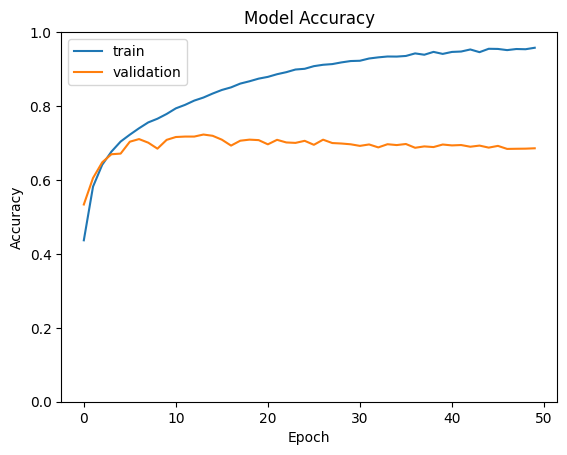

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.legend(['train','validation'])
plt.show()

Looking at the graph we can see the model is overfitting as there is significant differcence in the accuracy of training data and validation data.

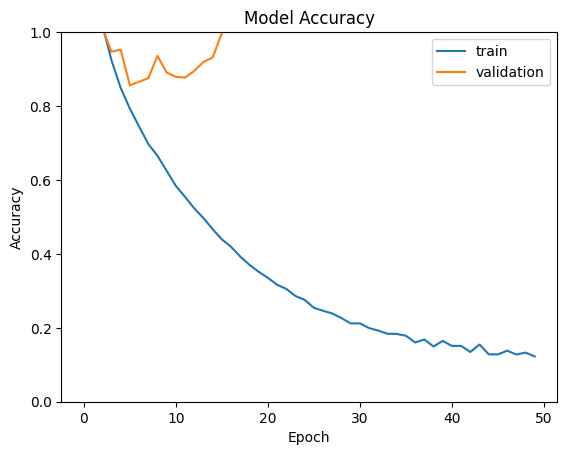

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.legend(['train','validation'])
plt.show()

Lets make the CNN deeper

In [17]:
from tensorflow.keras import layers, models

model = models.Sequential()


model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))


model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)         

In [ ]:
history1 = model.fit(training_images,training_labels,epochs=50,validation_data=(test_images,test_labels))

In [ ]:
model.save('deep_model2.h5')

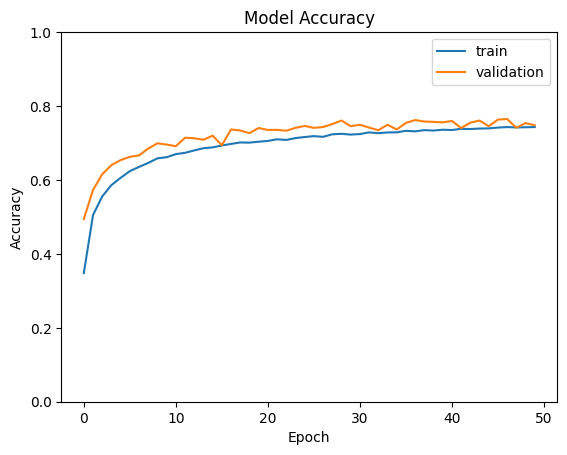

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.legend(['train','validation'])
plt.show()

As we can see the model is performing much more better than the previous model with increase in val_accuracy and avoding overfitting.

In [20]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.optimizers import SGD, Adam, RMSprop
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Flatten, Activation, Dropout
import matplotlib.pyplot as plt

Now we will Augment data in order to improve the model's performance even more

In [21]:

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [22]:

def create_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding = 'same', input_shape=X_train.shape[1:]))
    model.add(Activation('relu'))

    
    model.add(Conv2D(32, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size= (2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size= (2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model

In [23]:
BATCH_SIZE = 128
nb_epochs = 50
VALIDATION_SPLIT = 0.2
num_classes = 10


In [24]:
num_train, img_channels, img_rows, img_cols = X_train.shape
num_test, _, _, _= X_test.shape

In [25]:
print('X_train Shape:', X_train.shape)
training_samples = X_train.shape[0]
print("Training samples:", training_samples)
print("Test Samples:", y_test.shape[0])

X_train Shape: (50000, 32, 32, 3)
Training samples: 50000
Test Samples: 10000


In [26]:
class_names =['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [27]:

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [28]:

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [29]:



datagen = ImageDataGenerator(
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20  
)


In [30]:
model_aug = create_cnn_model()
model_aug.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics= ['accuracy'])

In [31]:
# lr = 0.01
# def learning_rate_decay(epoch):
#     return lr * (0.1 ** int(epoch / 10)) 

In [32]:
history2 = model_aug.fit(datagen.flow(X_train, y_train,batch_size = BATCH_SIZE),steps_per_epoch = X_train.shape[0] / BATCH_SIZE, 
                                        epochs = nb_epochs, verbose = 1,validation_data = (X_test, y_test),              
                                        callbacks = [ModelCheckpoint('model_aug.h5', save_best_only =True),
                                        EarlyStopping(monitor='val_accuracy', min_delta=0.000001, patience=10, 
                                        verbose=1, mode='auto')])
                                        
                                                     
                                                     

Epoch 1/50
390/390 [==============================] - 25s 60ms/step - loss: 1.6641 - accuracy: 0.3912 - val_loss: 1.2955 - val_accuracy: 0.5270
Epoch 2/50
390/390 [==============================] - 21s 53ms/step - loss: 1.3204 - accuracy: 0.5256 - val_loss: 1.0682 - val_accuracy: 0.6193
Epoch 3/50
390/390 [==============================] - 22s 56ms/step - loss: 1.1796 - accuracy: 0.5794 - val_loss: 1.0364 - val_accuracy: 0.6354
Epoch 4/50
390/390 [==============================] - 22s 56ms/step - loss: 1.0947 - accuracy: 0.6124 - val_loss: 1.0677 - val_accuracy: 0.6314
Epoch 5/50
390/390 [==============================] - 21s 55ms/step - loss: 1.0242 - accuracy: 0.6378 - val_loss: 0.8564 - val_accuracy: 0.7005
Epoch 6/50
390/390 [==============================] - 21s 55ms/step - loss: 0.9767 - accuracy: 0.6580 - val_loss: 0.9038 - val_accuracy: 0.6883
Epoch 7/50
390/390 [==============================] - 21s 54ms/step - loss: 0.9334 - accuracy: 0.6722 - val_loss: 0.8198 - val_accuracy:

In [33]:
model_aug.save('Aug_model2.h5')

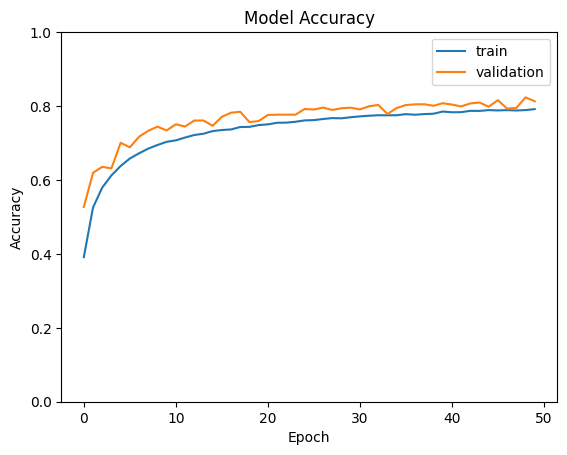

In [34]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.legend(['train','validation'])
plt.show()

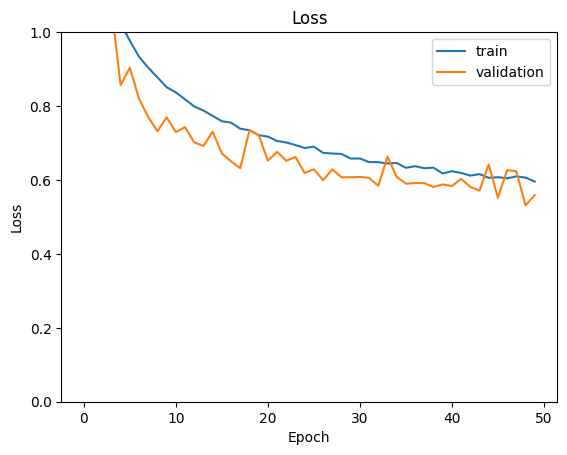

In [40]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title("Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0,1)
plt.legend(['train','validation'])
plt.show()

In [ ]:
loss3 , acc3 = model_aug.evaluate(test_images,test_labels)
print(acc3)

Conclusion:
The third model which utilized batch dropout and image augmentation showed better performacne than the previous 2 models. The accuracy of the third model is 82 percent.

Hence we will finalise the 3rd model for image recognition
